In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
import torch

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda', index=0)

In [0]:
import csv
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter
import matplotlib.pyplot as plt

import numpy as np
import os



%matplotlib inline 

In [0]:
l1 = pd.read_csv("./lyrics.csv")

In [7]:
l1.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [8]:
l1.groupby(['genre']).count()

,index,song,year,artist,lyrics
genre,,,,,
Country,17286,17286,17286,17286,14387
Electronic,16205,16205,16205,16205,7966
Folk,3241,3241,3241,3241,2243
Hip-Hop,33965,33965,33965,33965,24850
Indie,5732,5732,5732,5732,3149
Jazz,17147,17145,17147,17147,7971
Metal,28408,28408,28408,28408,23759
Not Available,29814,29814,29814,29814,23941
Other,23683,23683,23683,23683,5189


In [0]:
hiphop = l1.loc[l1['genre'] == "Hip-Hop" ]

In [10]:
hiphop.head()

,index,song,year,artist,genre,lyrics
249,249,i-got-that,2007,eazy-e,Hip-Hop,(horns)...\n(chorus)\nTimbo- When you hit me o...
250,250,8-ball-remix,2007,eazy-e,Hip-Hop,"Verse 1:\nI don't drink brass monkey, like to ..."
251,251,extra-special-thankz,2007,eazy-e,Hip-Hop,"19 muthaphukkin 93,\nand I'm back in this bitc..."
252,252,boyz-in-da-hood,2007,eazy-e,Hip-Hop,"Hey yo man, remember that shit Eazy did a whil..."
253,253,automoblie,2007,eazy-e,Hip-Hop,"Yo, Dre, man, I take this bitch out to the mov..."


In [0]:
from google.colab import files


hiphop.to_csv('hiphop.csv')


In [12]:
hiphop.groupby(['artist']).count().head()

,index,song,year,genre,lyrics
artist,,,,,
1000volts,1,1,1,1,0
112,97,97,97,97,95
18,2,2,2,2,0
1982,8,8,8,8,5
1982-termanology-and-statik-selektah,1,1,1,1,1


In [13]:
hiphop.count()

index     33965
song      33965
year      33965
artist    33965
genre     33965
lyrics    24850
dtype: int64

In [14]:
hiphop['lyrics'] = hiphop['lyrics'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
lyricsList = hiphop['lyrics'].tolist()

lyricss = l1['lyrics'].tolist()

In [16]:
lyricsList

["(horns)...\n(chorus)\nTimbo- When you hit me on my phone betta know what cha want, when you call me, you already know, on the low, im sayin Hey! i got that(dro). I got that(drank). I got that(?). I got. I gotta pocket fulla stones and im playin the corner, you want it, you already know, you sicko. Im sayin Hey!.about that. Hey!.about that. Hey!.about that. Hey! about. whoo!\n(verse 1)\nLil Eazy E- Lemme tell you bout a nigga name E (name E). Im hittin corners in compton and movin work gettin profit, they tryna stop it but im so low key (low key). They say with dollars come power, im stackin mine by the hour, man fuck that coward! Ima, get while the gettin's good, Got boyz in da hood, and bundles of Kush, Muthafucka George Bush! See he aint helpin us, the streets they respectin us, Government aint tryna help, so we just invest in us. Do whatever for a buck, in the hustle i trust, moved from the back of the bus to a Maybach in a tux. Livin that good life(life). Still Lovin that hood li

In [0]:
wordList = []

for i in lyricsList:
    wordList.append(i.split())

In [0]:
words = []
for i in wordList:
    for b in i:
        words.append(b)

In [19]:
words

['(horns)...',
 '(chorus)',
 'Timbo-',
 'When',
 'you',
 'hit',
 'me',
 'on',
 'my',
 'phone',
 'betta',
 'know',
 'what',
 'cha',
 'want,',
 'when',
 'you',
 'call',
 'me,',
 'you',
 'already',
 'know,',
 'on',
 'the',
 'low,',
 'im',
 'sayin',
 'Hey!',
 'i',
 'got',
 'that(dro).',
 'I',
 'got',
 'that(drank).',
 'I',
 'got',
 'that(?).',
 'I',
 'got.',
 'I',
 'gotta',
 'pocket',
 'fulla',
 'stones',
 'and',
 'im',
 'playin',
 'the',
 'corner,',
 'you',
 'want',
 'it,',
 'you',
 'already',
 'know,',
 'you',
 'sicko.',
 'Im',
 'sayin',
 'Hey!.about',
 'that.',
 'Hey!.about',
 'that.',
 'Hey!.about',
 'that.',
 'Hey!',
 'about.',
 'whoo!',
 '(verse',
 '1)',
 'Lil',
 'Eazy',
 'E-',
 'Lemme',
 'tell',
 'you',
 'bout',
 'a',
 'nigga',
 'name',
 'E',
 '(name',
 'E).',
 'Im',
 'hittin',
 'corners',
 'in',
 'compton',
 'and',
 'movin',
 'work',
 'gettin',
 'profit,',
 'they',
 'tryna',
 'stop',
 'it',
 'but',
 'im',
 'so',
 'low',
 'key',
 '(low',
 'key).',
 'They',
 'say',
 'with',
 'dollars

In [20]:
from collections import Counter 

word_count = Counter(words)

for i in (word_count.most_common()):
  if i[0] == 'rolex':
    print(i)


('rolex', 44)


In [0]:
clean_tokens = []

#brands = ['Dolce and Gabbana', 'gucci', 'versace', 'dior','nike' 'Burberry', 'balenciaga', 'Valentino', 'Off-White', 'Fendi', 'fendi','Givenchy', 'Balenciaga', 'Yves Saint Laurent', 'Prada', 'Gucci', 'Versace', 'Dior', 'Chanel', 'Alexander Wang', 'Nike']
for i in words:
    if i in brands:
      clean_tokens.append(i)

In [0]:
import nltk
freq = nltk.FreqDist(clean_tokens)

In [41]:
freq

FreqDist({'Adidas': 97,
          'Balenciaga': 4,
          'Chanel': 108,
          'Dior': 42,
          'Dolce': 49,
          'Fendi': 75,
          'Gabanna': 6,
          'Givenchy': 20,
          'Gucci': 658,
          'Mille': 3,
          'Nike': 153,
          'Off-White': 2,
          'Patek': 7,
          'Prada': 152,
          'Rolex': 141,
          'Valentino': 26,
          'Versace': 265,
          'adidas': 19,
          'dior': 3,
          'dolce': 2,
          'fendi': 6,
          'gabanna': 1,
          'gucci': 64,
          'mille': 20,
          'rolex': 44,
          'versace': 10})

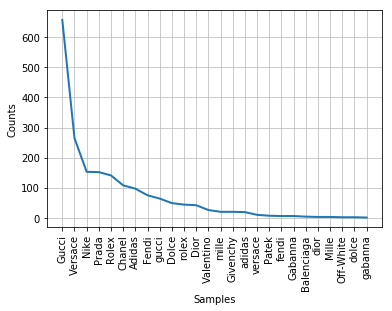

In [42]:
freq.plot(50, cumulative=False)

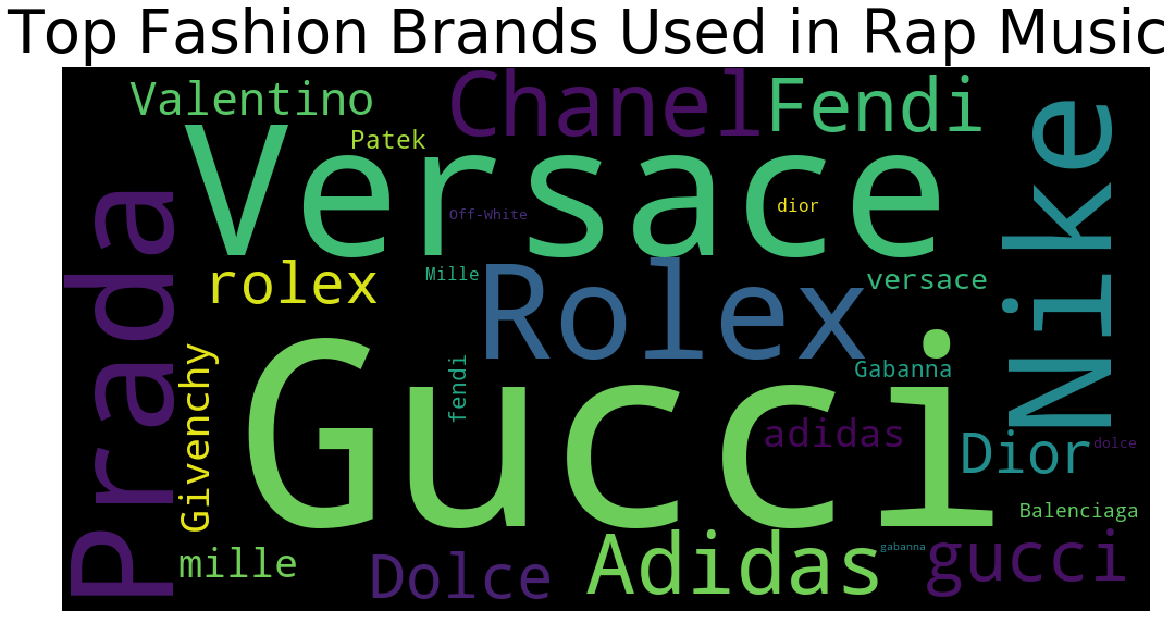

In [43]:
from wordcloud import WordCloud
word_could_dict=Counter(clean_tokens)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"Top Fashion Brands Used in Rap Music", fontsize=60, ha='center')
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [0]:
l2 = pd.read_csv("./songdata.csv")

In [26]:
l2.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [0]:
l2['lyrics'] = l2['text'].astype(str)

In [49]:
lyricsList1 = l2['text'].tolist()

KeyError: ignored

In [0]:
wordList1 = []

for i in lyricsList1:
    wordList1.append(i.split())

In [0]:
words1 = []
for i in wordList1:
    for b in i:
        words1.append(b)

In [31]:
from collections import Counter 

word_count1 = Counter(words1)

for i in (word_count1.most_common()):
  if i[0] == 'rolex':
    print(i)

('rolex', 6)


In [0]:
clean_tokens1 = []

brands = ['Dolce and Gabbana', 'Dolce', 'rolex', 'Rolex', 'patek', 'Patek',  'mille', 'Mille', 'dolce', 'Gabanna', 'gabanna', 'adidas', 'Adidas', 'gucci', 'versace', 'dior','nike' 'Burberry', 'balenciaga', 'Valentino', 'Off-White', 'Fendi', 'fendi','Givenchy', 'Balenciaga', 'Yves Saint Laurent', 'Prada', 'Gucci', 'Versace', 'Dior', 'Chanel', 'Alexander Wang', 'Nike']
for i in words:
    if i in brands:
      clean_tokens1.append(i)

In [0]:
import nltk
freq1 = nltk.FreqDist(clean_tokens1)

In [34]:
freq1

FreqDist({'Adidas': 97,
          'Balenciaga': 4,
          'Chanel': 108,
          'Dior': 42,
          'Dolce': 49,
          'Fendi': 75,
          'Gabanna': 6,
          'Givenchy': 20,
          'Gucci': 658,
          'Mille': 3,
          'Nike': 153,
          'Off-White': 2,
          'Patek': 7,
          'Prada': 152,
          'Rolex': 141,
          'Valentino': 26,
          'Versace': 265,
          'adidas': 19,
          'dior': 3,
          'dolce': 2,
          'fendi': 6,
          'gabanna': 1,
          'gucci': 64,
          'mille': 20,
          'rolex': 44,
          'versace': 10})

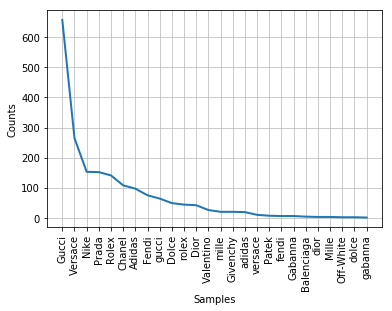

In [35]:
freq1.plot(50, cumulative=False)

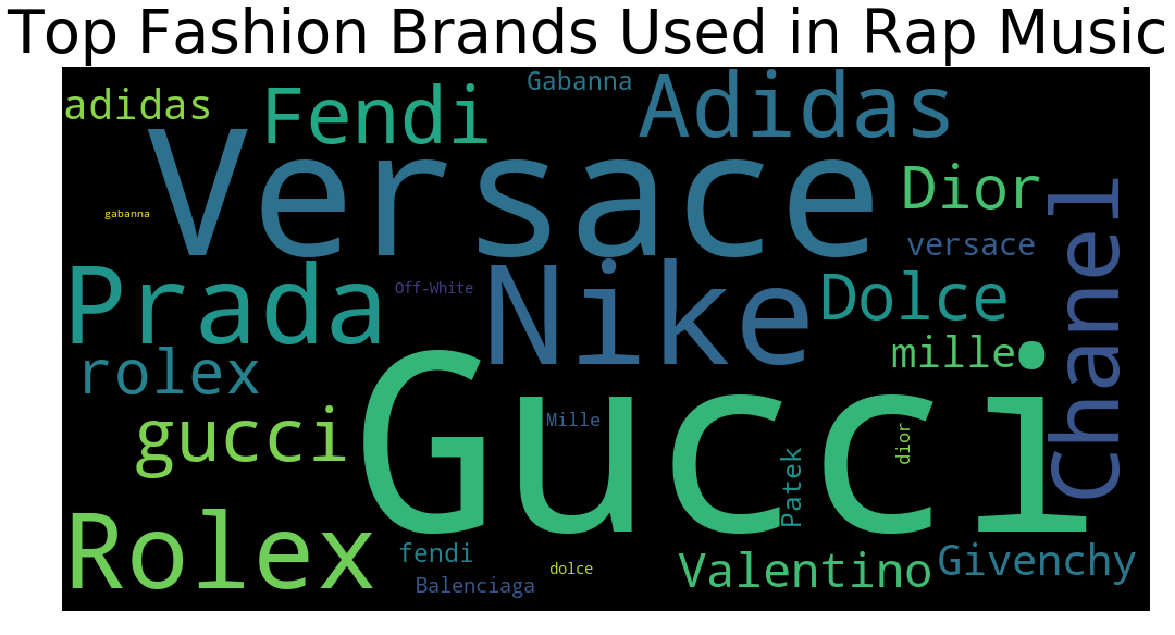

In [36]:
from wordcloud import WordCloud
word_could_dict1=Counter(clean_tokens1)
wordcloud1 = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict1)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"Top Fashion Brands Used in Rap Music", fontsize=60, ha='center')
plt.imshow(wordcloud1)
plt.axis("off")
plt.show() 

In [0]:
l3 = pd.read_csv("./hiphop1.csv")

In [46]:
l3.head()

,Unnamed: 0,artist,songs
0,0,03 Greedo,"[{'lyrics': ""[Intro]\nThree purple hearts\nThr..."
1,1,03 Greedo,"[{'lyrics': ""[Intro]\nI've been meditating wit..."
2,2,03 Greedo,"[{'lyrics': ""[Intro: 03 Greedo]\nAceTheFace\n0..."
3,3,03 Greedo,"[{'lyrics': ""[Intro]\nYou know me out here, ar..."
4,4,03 Greedo,"[{'lyrics': ""Lyrics from Snippet\n\n... no I'm..."


In [0]:
l3['songs'] = l3['songs'].astype(str)

In [0]:
lyricsList2 = l3['songs'].tolist()

In [0]:
wordList2 = []

for i in lyricsList2:
    wordList2.append(i.split())

In [0]:
words2 = []
for i in wordList2:
    for b in i:
        words2.append(b)

In [0]:
clean_tokens2 = []

brands = ['Dolce and Gabbana', 'Dolce', 'rolex', 'Rolex', 'patek', 'Patek',  'mille', 'Mille', 'dolce', 'Gabanna', 'gabanna', 'adidas', 'Adidas', 'gucci', 'versace', 'dior','nike' 'Burberry', 'balenciaga', 'Valentino', 'Off-White', 'Fendi', 'fendi','Givenchy', 'Balenciaga', 'Yves Saint Laurent', 'Prada', 'Gucci', 'Versace', 'Dior', 'Chanel', 'Alexander Wang', 'Nike']
for i in words2:
    if i in brands:
      clean_tokens2.append(i)
      
      
clean_tokens2 += clean_tokens

In [0]:
import nltk
freq2 = nltk.FreqDist(clean_tokens2)

In [63]:
freq2

FreqDist({'Adidas': 170,
          'Balenciaga': 37,
          'Chanel': 293,
          'Dior': 111,
          'Dolce': 122,
          'Fendi': 202,
          'Gabanna': 9,
          'Givenchy': 101,
          'Gucci': 2274,
          'Mille': 26,
          'Nike': 407,
          'Off-White': 33,
          'Patek': 101,
          'Prada': 325,
          'Rolex': 296,
          'Valentino': 39,
          'Versace': 453,
          'adidas': 29,
          'balenciaga': 1,
          'dior': 5,
          'dolce': 5,
          'fendi': 18,
          'gabanna': 1,
          'gucci': 180,
          'mille': 43,
          'patek': 3,
          'rolex': 73,
          'versace': 15})

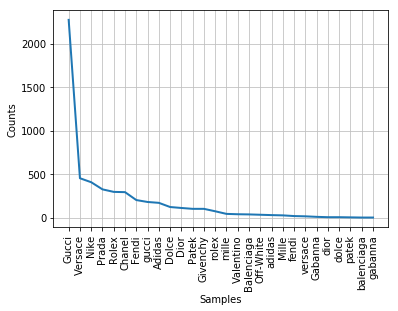

In [64]:
freq2.plot(50, cumulative=False)

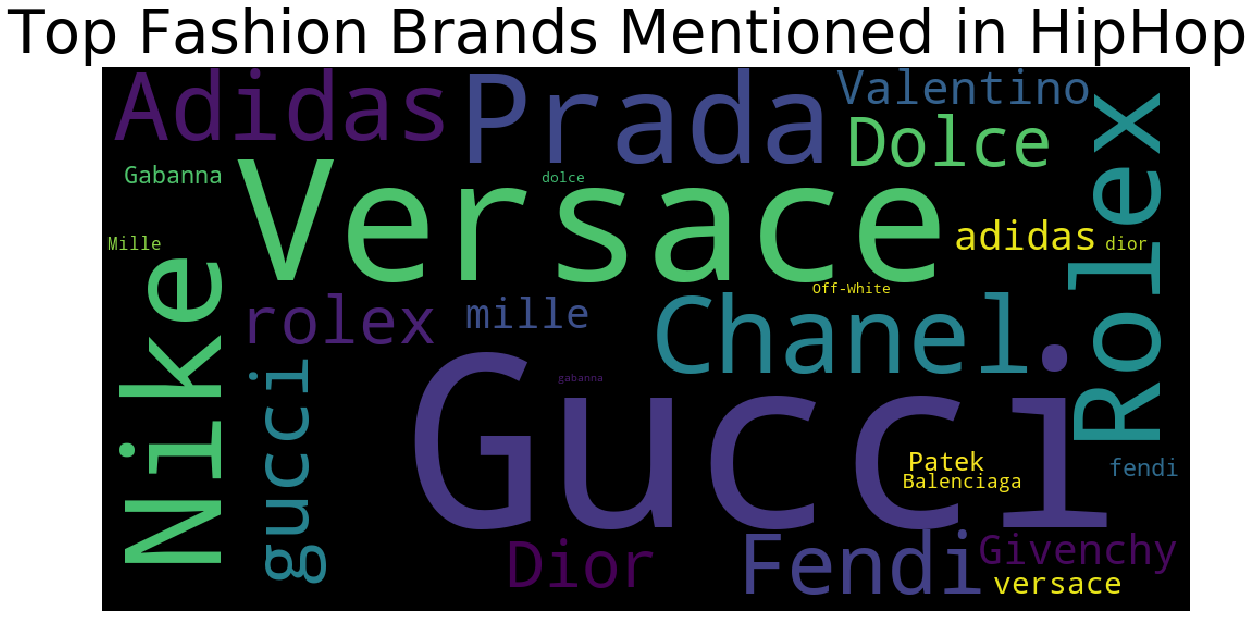

In [67]:
from wordcloud import WordCloud
word_could_dict1=Counter(clean_tokens1)
wordcloud1 = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict1)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"Top Fashion Brands Mentioned in HipHop", fontsize=60, ha='center')
plt.imshow(wordcloud1)
plt.axis("off")
plt.show() 